In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats

In [2]:
survey_df = pd.read_csv('clean_kaggle_data.csv', low_memory = False)

In [3]:
survey_df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_df['Q1'].isnull().values.any()

False

In [5]:
survey_df['Q2'].isnull().values.any()

False

In [6]:
survey_df['Q24'].isnull().values.any()

False

In [7]:
survey_df.shape

(10729, 356)

# Question 1 - Exploratory data

In [8]:
(survey_df['Q1'].unique())

array(['30-34', '35-39', '22-24', '55-59', '50-54', '25-29', '18-21',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [9]:
survey_df['Q1'].value_counts()

25-29    2350
30-34    1979
35-39    1467
22-24    1424
40-44    1042
45-49     771
50-54     536
18-21     498
60-69     309
55-59     301
70+        52
Name: Q1, dtype: int64

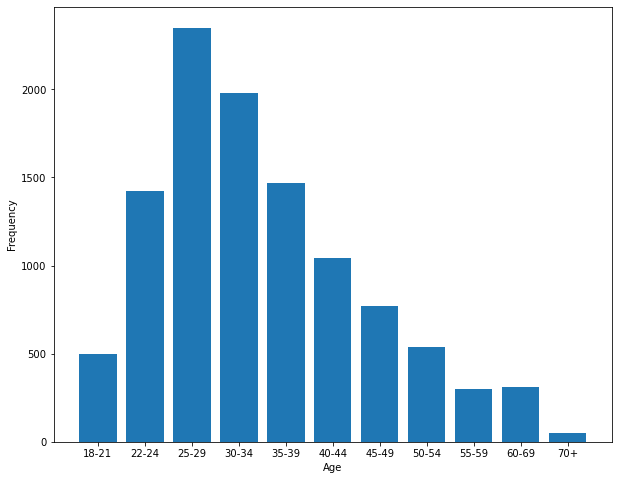

In [10]:
labels, counts = np.unique(survey_df['Q1'], return_counts = True)
plt.figure(figsize = (10, 8))
plt.bar(labels, counts)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

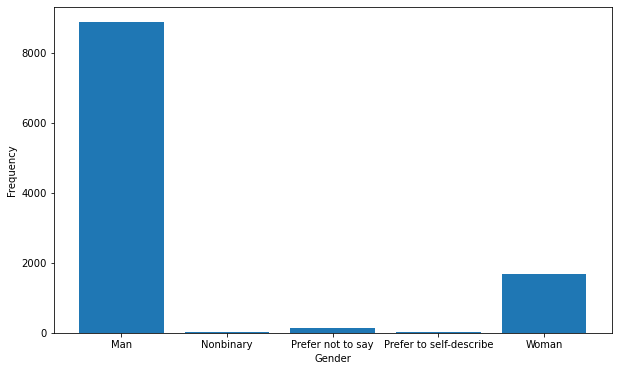

In [11]:
labels, counts = np.unique(survey_df['Q2'], return_counts = True)
plt.figure(figsize = (10, 6))
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel("Frequency")
plt.show()

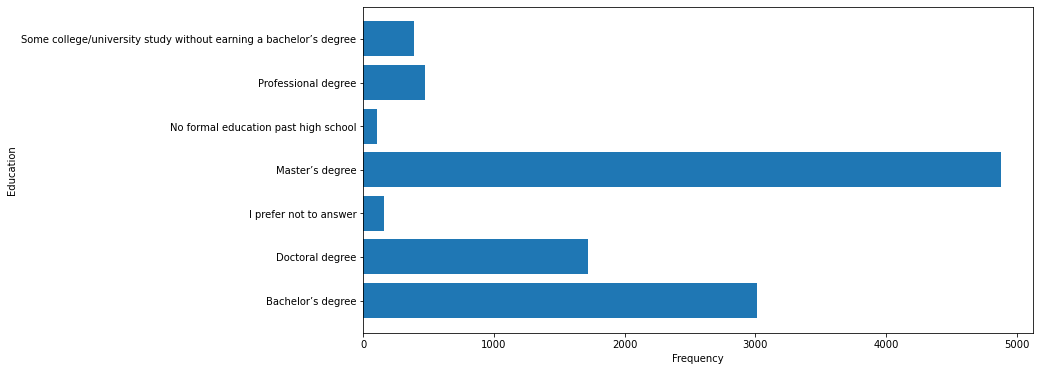

In [12]:
labels, count = np.unique(survey_df['Q4'], return_counts = True)
plt.figure(figsize = (12, 6))
plt.barh(labels, count)
plt.xlabel('Frequency')
plt.ylabel('Education')
plt.show()

# Question 2

## Showing descriptive statistics for each group

Text(0.5, 0, 'Gender')

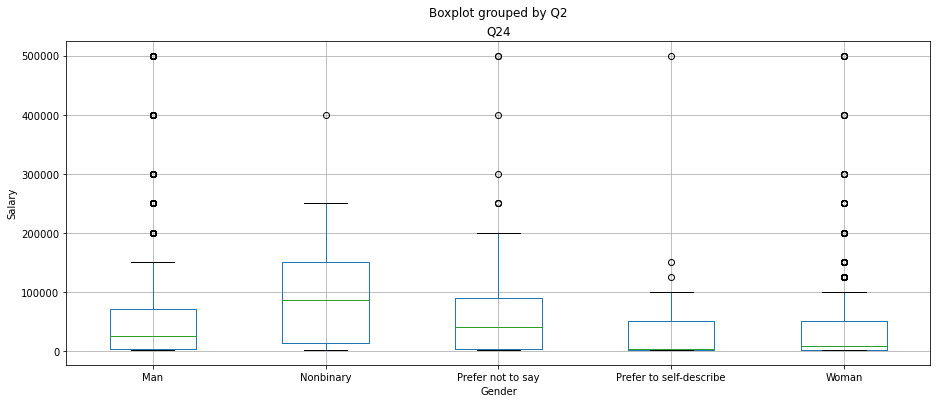

In [13]:
survey_df.boxplot(column = 'Q24', by = 'Q2', figsize = (15, 6))
plt.ylabel('Salary')
plt.xlabel("Gender")


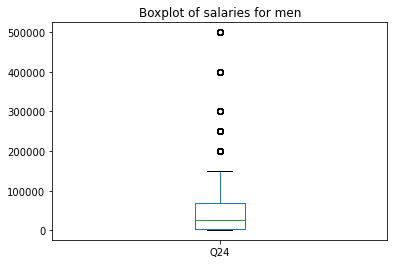

In [14]:
#Separating between men and women
men_survey_df = survey_df.loc[survey_df['Q2'] == 'Man'].copy()
men_survey_df = men_survey_df[['Q2', 'Q24']].copy()
men_survey_df.plot(x = 'Q2', y = 'Q24', kind = 'box', title = 'Boxplot of salaries for men')

In [15]:
quantiles = [0.25, 0.50, 0.75]
for quantile in quantiles:
    quantile_value = men_survey_df.quantile(q = quantile)
    print("quantile: " + str(quantile))
    print(quantile_value)

quantile: 0.25
Q24    3000.0
Name: 0.25, dtype: float64
quantile: 0.5
Q24    25000.0
Name: 0.5, dtype: float64
quantile: 0.75
Q24    70000.0
Name: 0.75, dtype: float64


In [16]:
men_mean = men_survey_df['Q24'].mean()
men_median = men_survey_df['Q24'].median()
men_stdev = men_survey_df['Q24'].std()

print("Mean salary for men: " + str(men_mean))
print("Standard deviation: " + str(men_stdev))
print('Median salary for men: ' + str(men_median))

Mean salary for men: 50750.61992786294
Standard deviation: 70347.97481240088
Median salary for men: 25000.0


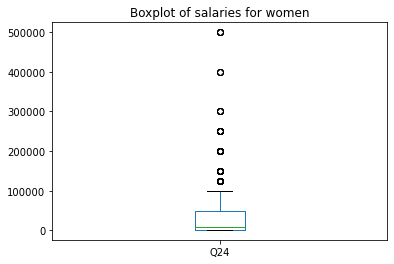

In [17]:
women_survey_df = survey_df.loc[survey_df['Q2'] == 'Woman'].copy()
women_survey_df = women_survey_df[['Q2', 'Q24']].copy()
women_survey_df.plot(x = 'Q2', y = 'Q24', kind = 'box', title = 'Boxplot of salaries for women')

In [18]:
quantiles = [0.25, 0.50, 0.75]
for quantile in quantiles:
    quantile_value = women_survey_df.quantile(q = quantile)
    print("quantile: " + str(quantile))
    print(quantile_value)

quantile: 0.25
Q24    1000.0
Name: 0.25, dtype: float64
quantile: 0.5
Q24    7500.0
Name: 0.5, dtype: float64
quantile: 0.75
Q24    50000.0
Name: 0.75, dtype: float64


In [19]:
women_mean = women_survey_df['Q24'].mean()
women_median = women_survey_df['Q24'].median()
women_stdev = women_survey_df['Q24'].std()

print('Mean salary for women ' + str(women_mean))
print("Standard deviation: " + str(women_stdev))
print("Median salary for women " + str(women_median))

Mean salary for women 36417.11229946524
Standard deviation: 59442.71609315435
Median salary for women 7500.0


## two-sample t-test

In [20]:
# now performing a two_sample t_test with 0.05 threshold
#Null hypothesis: the mean value between the men and the women are the same
scipy.stats.ttest_ind(men_survey_df['Q24'], women_survey_df['Q24'], equal_var = False)

Ttest_indResult(statistic=8.792916020018406, pvalue=2.5655984594105773e-18)

In [21]:
#returned p-value < 0.05 threshold, so there is a statistical difference. We reject the null hypothesis 

## Bootstraping data

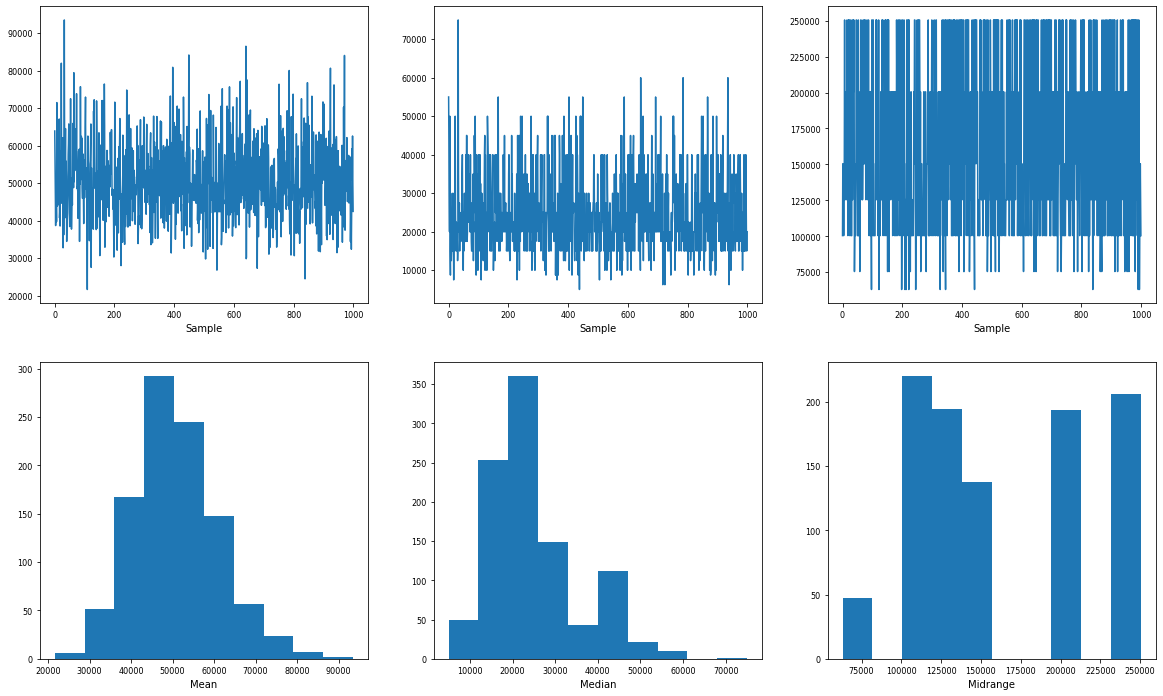

In [22]:
pd.plotting.bootstrap_plot(men_survey_df['Q24'], samples = 1000)
fig = plt.gcf()
fig.set_size_inches(20, 12)

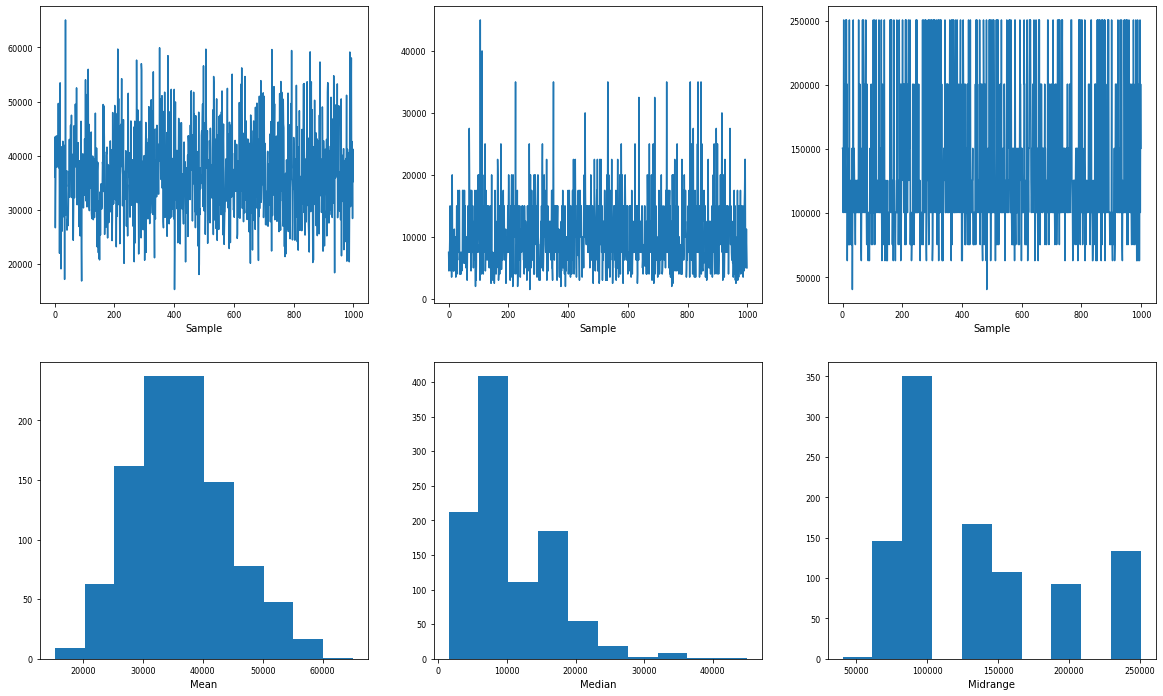

In [23]:
pd.plotting.bootstrap_plot(women_survey_df['Q24'], samples = 1000)
fig = plt.gcf()
fig.set_size_inches(20, 12)

In [24]:
# now working on the distribution of the difference in means 
women_bootstrap_means = np.zeros(1000)
for i in range(1000):
    women_bootstrap_means[i] = np.mean(np.random.choice(women_survey_df['Q24'].to_numpy(), size = 100, replace = True))
    
men_bootstrap_means = np.zeros(1000)
for i in range(1000):
    men_bootstrap_means[i] = np.mean(np.random.choice(men_survey_df['Q24'].to_numpy(), size = 10, replace = True))

means_differences = men_bootstrap_means - women_bootstrap_means
    

Text(0, 0.5, 'Frequency')

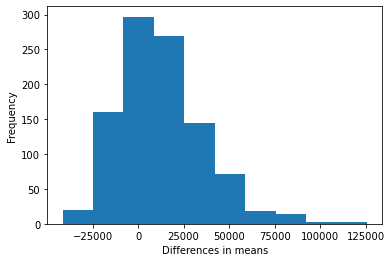

In [25]:
plt.hist(means_differences)
plt.xlabel("Differences in means")
plt.ylabel("Frequency")

In [26]:
#now performing two-sample t-test
#Null hypothesis: the means of the two sample groups are the same 
scipy.stats.ttest_ind(men_bootstrap_means, women_bootstrap_means, equal_var = False)

Ttest_indResult(statistic=17.92790954277941, pvalue=1.5958567061117072e-63)

In [27]:
#given p-value < 0.05 threshold, we reject the null hypothesis

## Comment on findings

using a t-test on both the oriignal data and the bootstrapped data shows that there is a difference in the income between men and women

# Highest level of education

In [28]:
survey_df = pd.read_csv('clean_kaggle_data.csv', low_memory = False)

In [29]:
survey_df['Q4'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'], dtype=object)

Text(0.5, 0, 'Highest education')

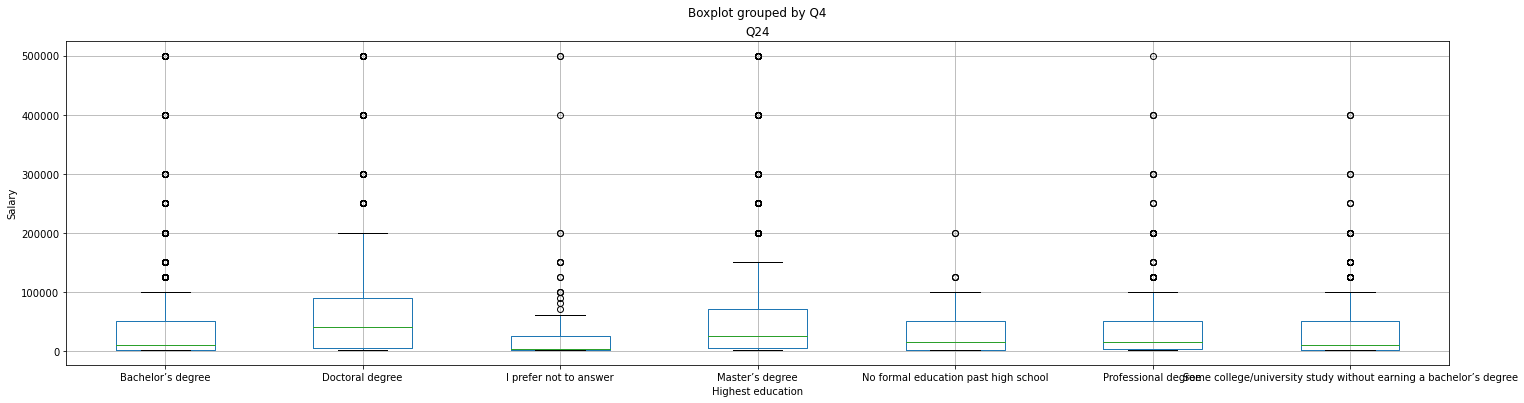

In [30]:
survey_df.boxplot(column = 'Q24', by = 'Q4', figsize = (24, 6))
plt.ylabel("Salary")
plt.xlabel("Highest education")

## Bachelor degree

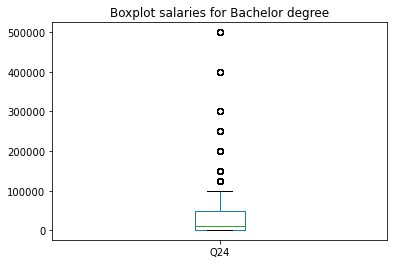

In [31]:
bachelor_df = survey_df.loc[survey_df['Q4'] =='Bachelor’s degree'].copy()
bachelor_df.plot(x = 'Q4', y = 'Q24', kind = 'box', title = 'Boxplot salaries for Bachelor degree')

In [32]:
quantiles = [0.25, 0.50, 0.75]
for quantile in quantiles:
    quantile_value = bachelor_df.quantile(q = quantile)
    print("quantile: " + str(quantile))
    print(quantile_value)

quantile: 0.25
Unnamed: 0                             5030.0
Time from Start to Finish (seconds)     538.0
Q24                                    1000.0
Name: 0.25, dtype: float64
quantile: 0.5
Unnamed: 0                             10110.0
Time from Start to Finish (seconds)      715.0
Q24                                    10000.0
Name: 0.5, dtype: float64
quantile: 0.75
Unnamed: 0                             14985.0
Time from Start to Finish (seconds)     1122.0
Q24                                    50000.0
Name: 0.75, dtype: float64


In [33]:
bachelor_mean = bachelor_df['Q24'].mean()
bachelor_median = bachelor_df['Q24'].median()
bachelor_stdev = bachelor_df['Q24'].std()

print("Mean salary for Bachelor Degree: " + str(bachelor_mean))
print("Standard deviation: " + str(bachelor_stdev))
print("Median salary for Bachelor Degree: " + str(bachelor_median))

Mean salary for Bachelor Degree: 35732.82442748092
Standard deviation: 60247.75354588311
Median salary for Bachelor Degree: 10000.0


## Master degree

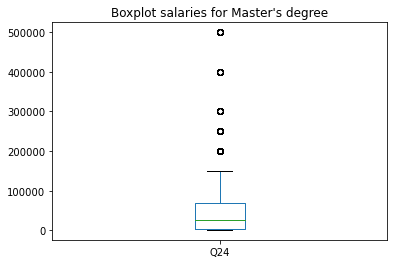

In [34]:
master_df = survey_df.loc[survey_df['Q4'] == "Master’s degree"].copy()
master_df.plot(x = 'Q4', y = 'Q24', kind = 'box', title = "Boxplot salaries for Master's degree")

In [35]:
quantiles = [0.25, 0.50, 0.75]
for quantile in quantiles:
    quantile_value = master_df.quantile(q = quantile)
    print("quantile: " + str(quantile))
    print(quantile_value)

quantile: 0.25
Unnamed: 0                             5084.5
Time from Start to Finish (seconds)     545.0
Q24                                    4000.0
Name: 0.25, dtype: float64
quantile: 0.5
Unnamed: 0                             10096.0
Time from Start to Finish (seconds)      748.0
Q24                                    25000.0
Name: 0.5, dtype: float64
quantile: 0.75
Unnamed: 0                             15177.5
Time from Start to Finish (seconds)     1162.0
Q24                                    70000.0
Name: 0.75, dtype: float64


In [36]:
master_mean = master_df['Q24'].mean()
master_median = master_df['Q24'].median()
master_stdev = master_df['Q24'].std()

print("Mean salary for Master Degree: " + str(master_mean))
print("Standard deviation: " + str(master_stdev))
print("Median salary for Master Degree: " + str(master_median))

Mean salary for Master Degree: 52120.106579217056
Standard deviation: 67681.5715283553
Median salary for Master Degree: 25000.0


## Doctorate degree

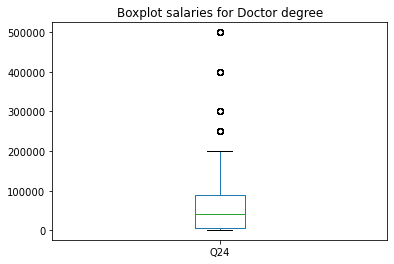

In [37]:
doctor_df = survey_df.loc[survey_df['Q4'] == "Doctoral degree"].copy()
doctor_df.plot(x = 'Q4', y = 'Q24', kind = 'box', title = "Boxplot salaries for Doctor degree")


In [38]:
for quantile in quantiles:
    quantile_value = doctor_df.quantile(q = quantile)
    print("quantile: " + str(quantile))
    print(quantile_value)

quantile: 0.25
Unnamed: 0                             5169.5
Time from Start to Finish (seconds)     556.0
Q24                                    5000.0
Name: 0.25, dtype: float64
quantile: 0.5
Unnamed: 0                             10110.5
Time from Start to Finish (seconds)      759.0
Q24                                    40000.0
Name: 0.5, dtype: float64
quantile: 0.75
Unnamed: 0                             15015.25
Time from Start to Finish (seconds)     1181.25
Q24                                    90000.00
Name: 0.75, dtype: float64


In [39]:
doctor_mean = doctor_df['Q24'].mean()
doctor_median = doctor_df['Q24'].median()
doctor_stdev = doctor_df['Q24'].std()

print("Mean salary for Doctorate Degree: " + str(doctor_mean))
print("Standard deviation: " + str(doctor_stdev))
print("Median salary for Doctorate Degree: " + str(doctor_median))

Mean salary for Doctorate Degree: 68719.44121071012
Standard deviation: 85403.65039433412
Median salary for Doctorate Degree: 40000.0


## ANOVA tests

In [40]:
scipy.stats.f_oneway(bachelor_df['Q24'], master_df['Q24'], doctor_df['Q24'])

F_onewayResult(statistic=129.7560112960932, pvalue=2.4852074227874282e-56)

In [41]:
#With a threshold of 0.05, we reject the null hypothesis of the means being equal

## Bootstrapping the data

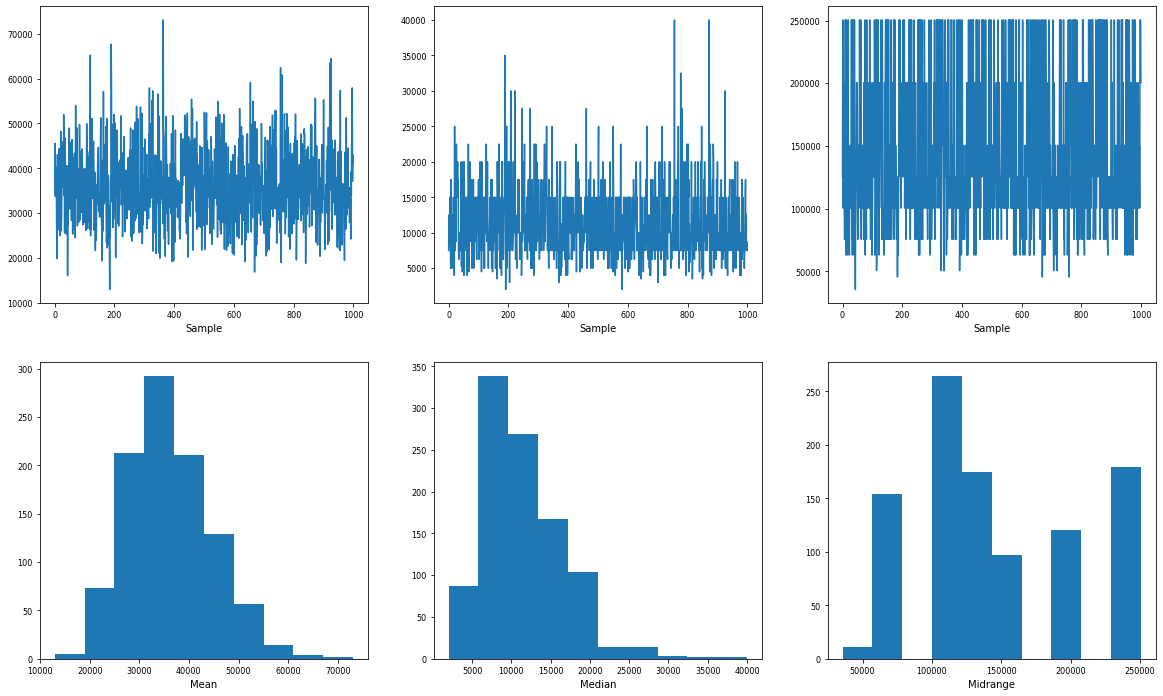

In [42]:
pd.plotting.bootstrap_plot(bachelor_df['Q24'], samples = 1000)
fig = plt.gcf()
fig.set_size_inches(20, 12)

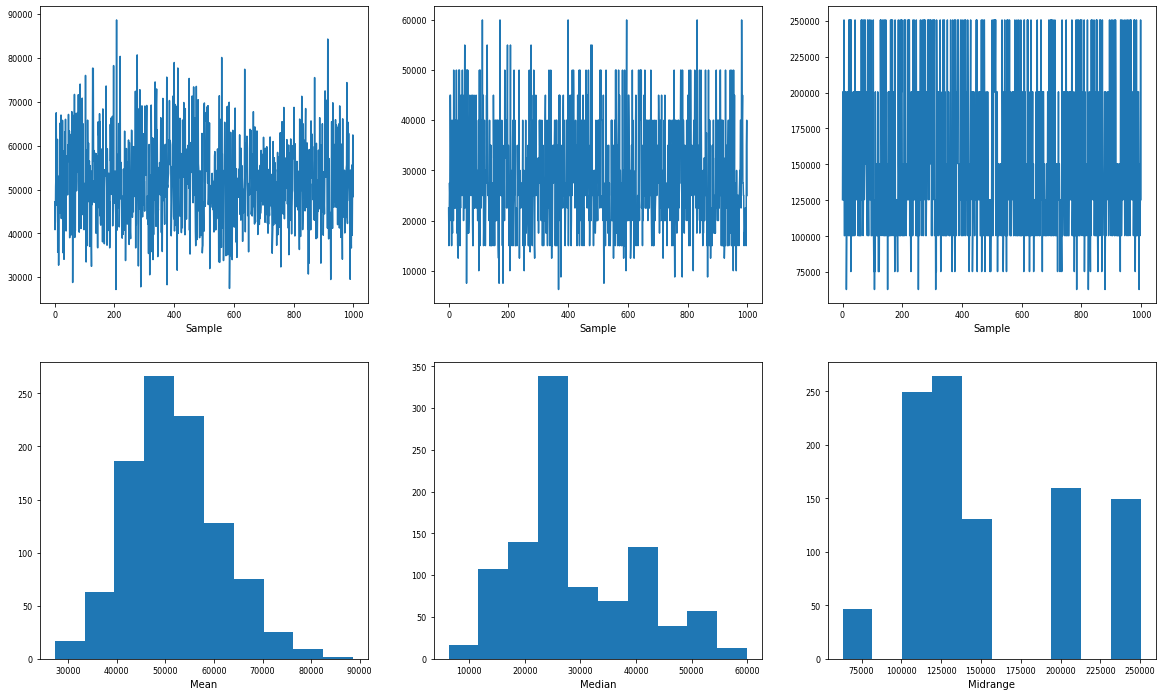

In [43]:
pd.plotting.bootstrap_plot(master_df['Q24'], samples = 1000)
fig = plt.gcf()
fig.set_size_inches(20, 12)

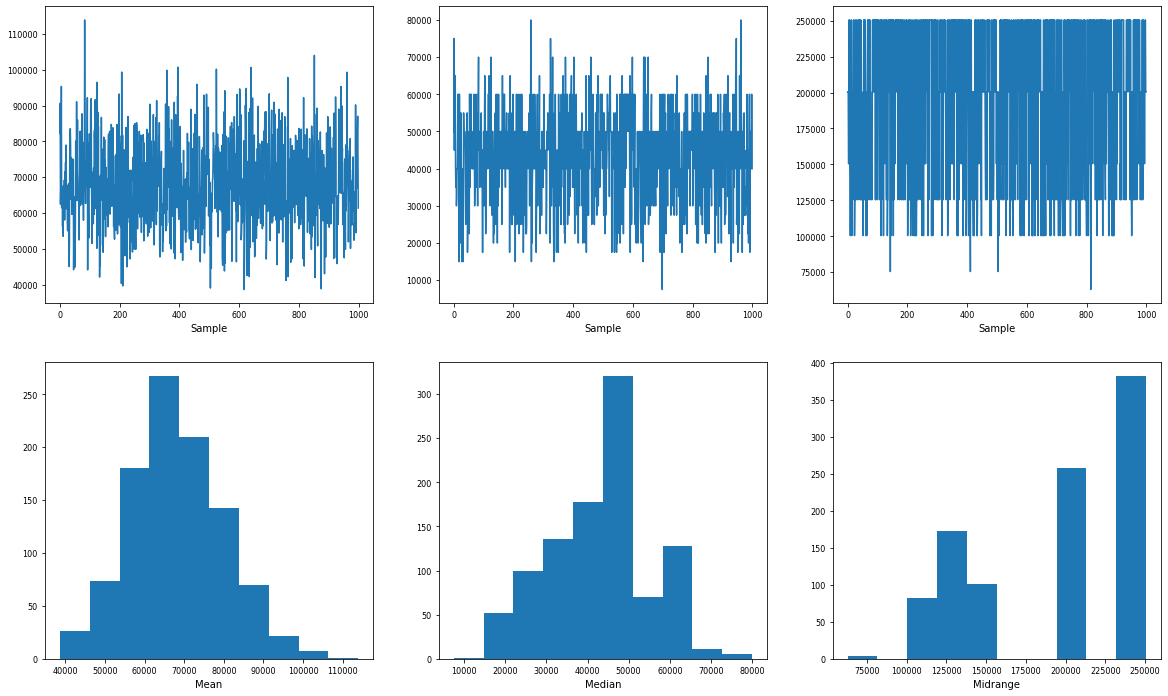

In [44]:
pd.plotting.bootstrap_plot(doctor_df['Q24'], samples = 1000)
fig = plt.gcf()
fig.set_size_inches(20, 12)

## Now working on the difference in means for the bootstrapping

In [45]:
# now working on tghe distribution of the bootstrapping
bachelor_bootstrap_means = np.zeros(1000)
for i in range(1000):
    bachelor_bootstrap_means[i] = np.mean(np.random.choice(bachelor_df['Q24'].to_numpy(), size = 100, replace = True))
    
master_bootstrap_means = np.zeros(1000)
for i in range(1000):
    master_bootstrap_means[i] = np.mean(np.random.choice(master_df['Q24'].to_numpy(), size = 100, replace = True))
    
    
doctor_bootstrap_means = np.zeros(1000)
for i in range(1000):
    doctor_bootstrap_means[i] = np.mean(np.random.choice(doctor_df['Q24'].to_numpy(), size = 100, replace = True))

In [46]:
#now finding the difrerence in emans 

Text(0, 0.5, 'Frequency')

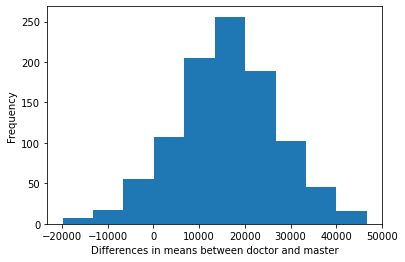

In [47]:
means_differences = doctor_bootstrap_means - master_bootstrap_means
plt.hist(means_differences)
plt.xlabel("Differences in means between doctor and master")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

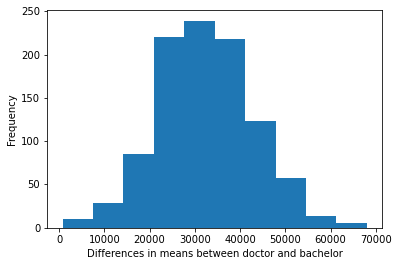

In [48]:
means_differences = doctor_bootstrap_means - bachelor_bootstrap_means
plt.hist(means_differences)
plt.xlabel("Differences in means between doctor and bachelor")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

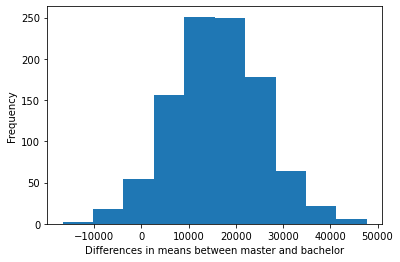

In [49]:
means_differences = master_bootstrap_means - bachelor_bootstrap_means
plt.hist(means_differences)
plt.xlabel("Differences in means between master and bachelor")
plt.ylabel("Frequency")

In [50]:
#now perofming the ANOVA 

#null hypothesis: Sample means are equal

In [51]:
scipy.stats.f_oneway(bachelor_bootstrap_means, master_bootstrap_means, doctor_bootstrap_means)

F_onewayResult(statistic=5003.980892873209, pvalue=0.0)

given the returned p-value is less than the 0.05 threshold, we reject the null hypothesis

## comment on findings

We were able to show there were statistically significant differences between a bachelor, master, and doctorate degrees 